# Pima Indians Diabetes Database

**TASK : Predict the onset of diabetes based on diagnostic measures**

![](http://www.diabeteshealth.com/wp-content/uploads/2016/12/diabetes.jpg)

***Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy.***

**Early Signs of Diabetes**

* Hunger and fatigue. Your body converts the food you eat into glucose that your cells use for energy*
* Peeing more often and being thirstier
* Dry mouth and itchy skin
* Blurred vision


# IMPORTING THE LIBRARIES

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


# LOADING THE DATASET

In [8]:
data = pd.read_csv('./data/processed/pima_diabetes/diabetes.csv') 


In [9]:
data.head()  #displaying the head of dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.describe()      #description of dataset 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [13]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

***Checking Null Values***

# Exploratory Data Analysis

In [14]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

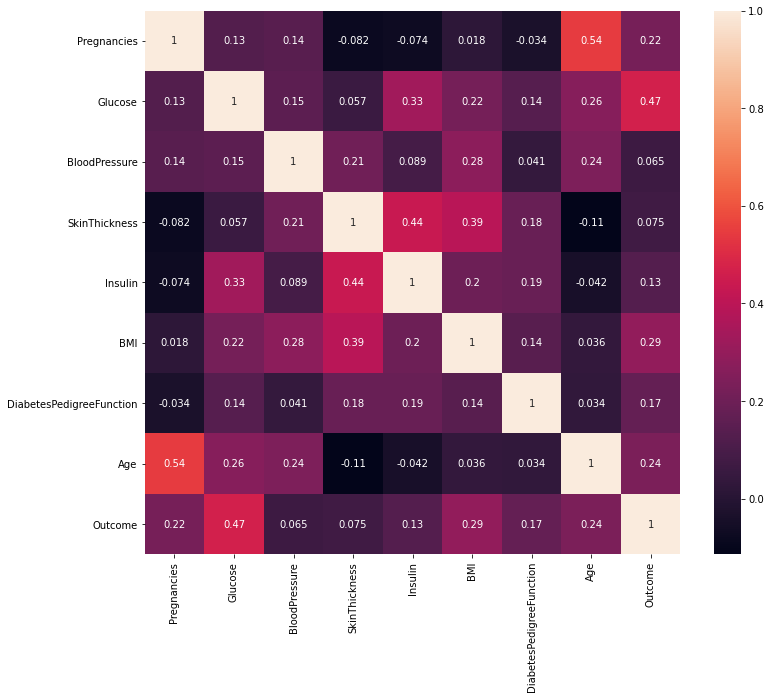

In [15]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)



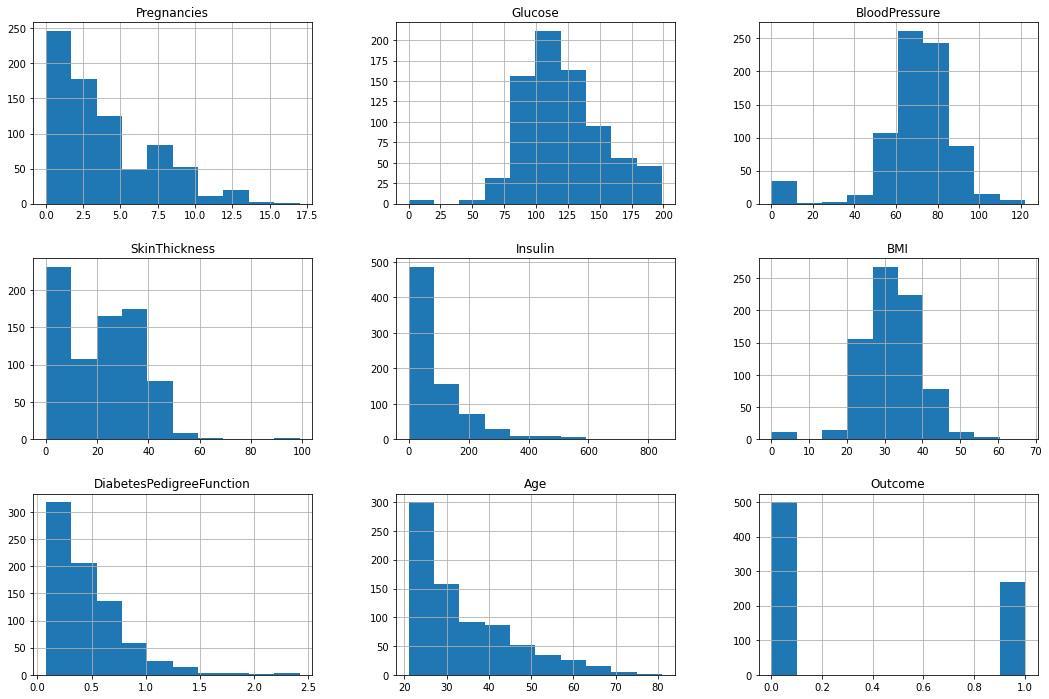

In [16]:
data.hist(figsize=(18,12))
plt.show()



# TRAINING AND TESTING DATA

In [17]:
#train_test_splitting of the dataset

x = data.drop(columns = 'Outcome')

# Getting Predicting Value
y = data['Outcome']

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [18]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


614
154
614
154


# MODELS

# 1. Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
weights_train = np.ones(614)/768
weights_test = np.ones(768-614)/768
reg = LogisticRegression()
reg.fit(x_train,y_train,sample_weight=weights_train)

LogisticRegression()

In [26]:
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred,sample_weight=weights_test))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86 0.13932291666666657
           1       0.72      0.60      0.65 0.061197916666666706

    accuracy                           0.81 0.2005208333333333
   macro avg       0.78      0.75      0.76 0.2005208333333333
weighted avg       0.80      0.81      0.80 0.2005208333333333

Confusion Matrix:
 [[96 11]
 [19 28]]
Training Score:
 76.2214983713355
Mean Squared Error:
 0.19480519480519481
R2 score is:
 0.08132829588387358


In [27]:
print(accuracy_score(y_test,y_pred)*100)

80.51948051948052


**So we get a accuracy score of 82.46 % using Logistic Regression**

# 2. KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)


In [ ]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

In [ ]:
print(accuracy_score(y_test,y_pred)*100)



**So we get a accuracy score of 75.97 % using KNeighborsClassifier**

# 3. SVC

In [52]:
from sklearn.svm import SVC

svc = SVC(C=100)
svc.fit(x_train, y_train)


SVC(C=100)

In [53]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.77      0.57      0.66        47

    accuracy                           0.82       154
   macro avg       0.80      0.75      0.77       154
weighted avg       0.81      0.82      0.81       154

Confusion Matrix:
 [[99  8]
 [20 27]]
Training Score:
 78.99022801302932
Mean Squared Error:
 0.18181818181818182
R2 score is:
 0.14257307615828196


In [54]:

print(accuracy_score(y_test,y_pred)*100)


81.81818181818183


**So we get a accuracy score of 79.22 % using SVC**

# 4. Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [56]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix:
 [[93 14]
 [18 29]]
Training Score:
 75.7328990228013
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [57]:
print("Accuracy Score:\n",gnb.score(x_train,y_train)*100)

Accuracy Score:
 75.7328990228013


**So we get a accuracy score of 75.73 % using Naiye Bayes**

# 5. DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)


In [ ]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

In [ ]:
print(accuracy_score(y_test,y_pred)*100)



**So we get accuracy score of 73.37 % using DecisionTreeClassifier**

# 6.  RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)


In [ ]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

**So we get a accuracy score of 81.18 % using RandomForestClassifier**

# 7. AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)




In [ ]:
y_pred=adb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",adb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

**So we get a accuracy score of 77.92 % using AdaBoostClassifier**

# 8. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)


In [ ]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

In [ ]:
print(accuracy_score(y_test,y_pred)*100)

**So we get a accuracy score of 81.81 % using GradientBoostingClassifier**

# 9. XGBClassifier

In [ ]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)


In [ ]:
y_pred=xgb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",xgb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

In [ ]:
xbg_accuracy=print(accuracy_score(y_test,y_pred)*100)

**So we get a accuracy score of 78.57 % using XGBClassifier**

# 10. ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

In [ ]:
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

In [ ]:
print(accuracy_score(y_test,y_pred)*100)

 **So we get a accuracy score of 80.51 % using ExtraTreesClassifier**

In [ ]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data


***So now we conclude the accuracy of different models:***

* Logistic Regression= 82.46 %
* KNeighbors Classifier= 75.97 %
* SVC= 79.22 %
* Naiye Bayes= 75.73 %
* Decision Tree Classifier= 73.37%
* Random Forest Classifier= 81.57%
* Ada Boost Classifier= 77.92%
* Gradient Boosting Classifier= 81.81%
* XGB Classifier= 78.57%
* Extra Trees Classifier= 80.51%





# **If you liked this notebook, please UPVOTE it.**